In [19]:
import pickle
from typing import List, Any, Dict
import matplotlib.pyplot as plt
import numpy as np

In [15]:
with open('/data/hujunhao/FlowServe/datasets/ShareGPT_V3_unfiltered_cleaned_split_cached.pkl', 'rb') as f:
    ShareGPT = pickle.load(f)
with open('/data/hujunhao/FlowServe/datasets/hotpotqa_100_cached.pkl', 'rb') as f:
    ReAct = pickle.load(f)
with open('/data/hujunhao/FlowServe/datasets/LooGLE/shortdep_qa_cached.pkl', 'rb') as f:
    LooGLE = pickle.load(f)

In [43]:
def plot_cdf(
    datasets: Dict[str, List[Any]],
    title: str = 'CDF',
    xlabel: str = 'Length',
    ylabel: str = 'CDF',
    saved_path: str = None
):
    
    for name, dataset in datasets.items():
        
        data_sorted = np.sort(dataset)

        # Calculate the proportional values of samples
        p = 1. * np.arange(len(data_sorted)) / (len(data_sorted) - 1)
        plt.plot(data_sorted, p, label=name)


    # Plot the CDF
    plt.xlim(-0.1)
    plt.ylim(-0.1, 1.1)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=12)
    plt.legend()
    plt.grid(True)
    if saved_path:
        plt.savefig(saved_path)
    else:
        plt.show()

def get_prompt_lens(reqs):
    return [req[-2] for req in reqs]

def get_completion_lens(reqs):
    return [req[-1] for req in reqs]

def get_prompts(reqs):
    return [req[0] for req in reqs]

In [33]:
prompt_lens = {
    'ShareGPT': get_prompt_lens(ShareGPT),
    'ReAct': get_prompt_lens(ReAct),
    'LooGLE': get_prompt_lens(LooGLE)
}

completion_lens = {
    'ShareGPT': get_completion_lens(ShareGPT),
    'ReAct': get_completion_lens(ReAct),
    'LooGLE': get_completion_lens(LooGLE)
}

prompt_VS_completion = {
    'ShareGPT': np.array(prompt_lens['ShareGPT']) / np.array(completion_lens['ShareGPT']),
    'ReAct': np.array(prompt_lens['ReAct']) / np.array(completion_lens['ReAct']),
    'LooGLE': np.array(prompt_lens['LooGLE']) / np.array(completion_lens['LooGLE'])
}

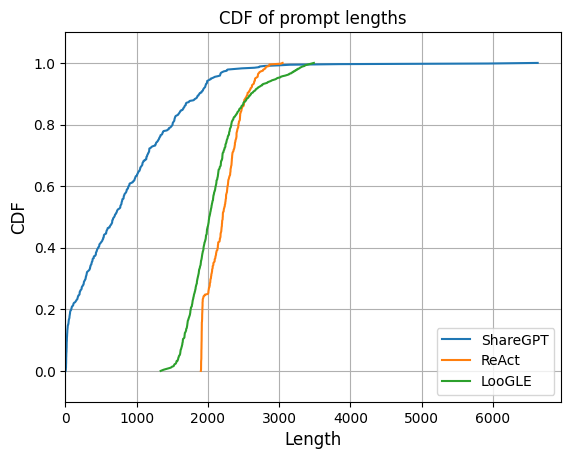

In [31]:
plot_cdf(
    prompt_lens,
    title='CDF of prompt lengths',
    saved_path='/data/hujunhao/FlowServe/prompt_lens.png'
)

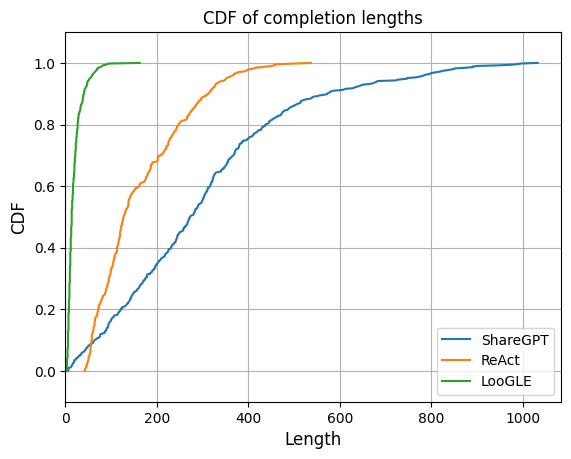

In [32]:
plot_cdf(
    completion_lens,
    title='CDF of completion lengths',
    saved_path='/data/hujunhao/FlowServe/completion_lens.png'
)

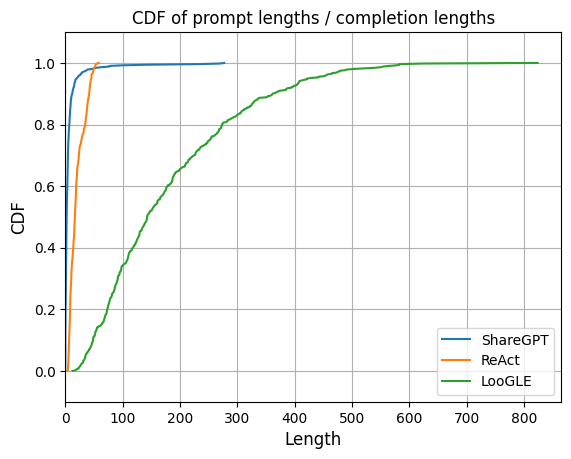

In [34]:
plot_cdf(
    prompt_VS_completion,
    title='CDF of prompt lengths / completion lengths',
    saved_path='/data/hujunhao/FlowServe/prompt_VS_completion.png'
)

In [46]:
prompts = {
    'ShareGPT': get_prompts(ShareGPT),
    'ReAct': get_prompts(ReAct),
    'LooGLE': get_prompts(LooGLE)
}

shared_prefix_lens = {
    'ShareGPT': [0],
    'ReAct': [0],
    'LooGLE': [0]
}

shared_prefix_precentage = {
    'ShareGPT': [0],
    'ReAct': [0],
    'LooGLE': [0]
}

for name, dataset in prompts.items():
    for i in range(1, len(dataset)):
        if dataset[i-1] in dataset[i]:
            shared_prefix_lens[name].append(prompt_lens[name][i-1])
            shared_prefix_precentage[name].append(prompt_lens[name][i-1] / prompt_lens[name][i])
        else:
            shared_prefix_lens[name].append(0)
            shared_prefix_precentage[name].append(0)

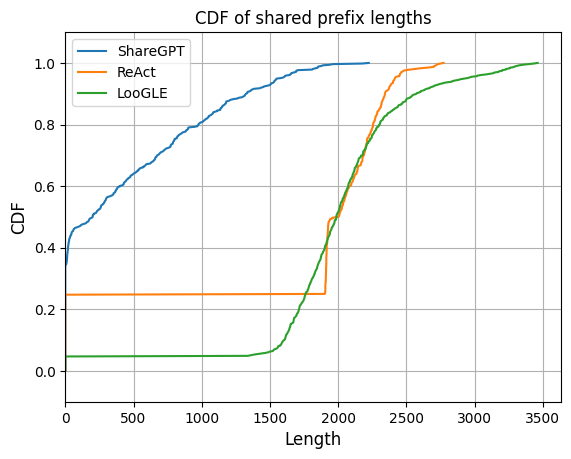

In [47]:
plot_cdf(
    shared_prefix_lens,
    title='CDF of shared prefix lengths',
    saved_path='/data/hujunhao/FlowServe/shared_prefix_lens.png'
)

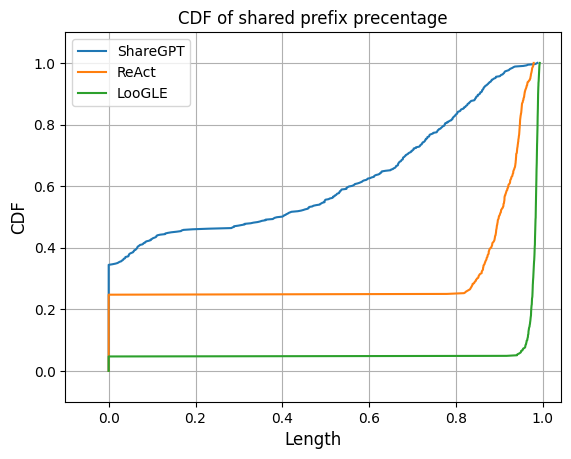

In [48]:
plot_cdf(
    shared_prefix_precentage,
    title='CDF of shared prefix precentage',
    saved_path='/data/hujunhao/FlowServe/shared_prefix_precentage.png'
)